# CleanCarChecker


In [1]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from PIL import Image

## Preprocessing of data
* Normalizing input (rescale)
* Slight rotation and width/height shift
* Vertical flips

In [2]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.05,
    height_shift_range=0.05,
    brightness_range=(0.9, 1.1),
    horizontal_flip=True
)

## Load training data

* Size: 500 x 250
* Batch size of 32 is good default value

In [3]:
train_dir = "./data_clean"
IMG_WIDTH = 300
IMG_HEIGHT = 250
batch_size = 32

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

print(train_data_gen.class_indices)

Found 1892 images belonging to 2 classes.
{'cars': 0, 'e-cars': 1}


## Display samples from training set
* for verification of image processing

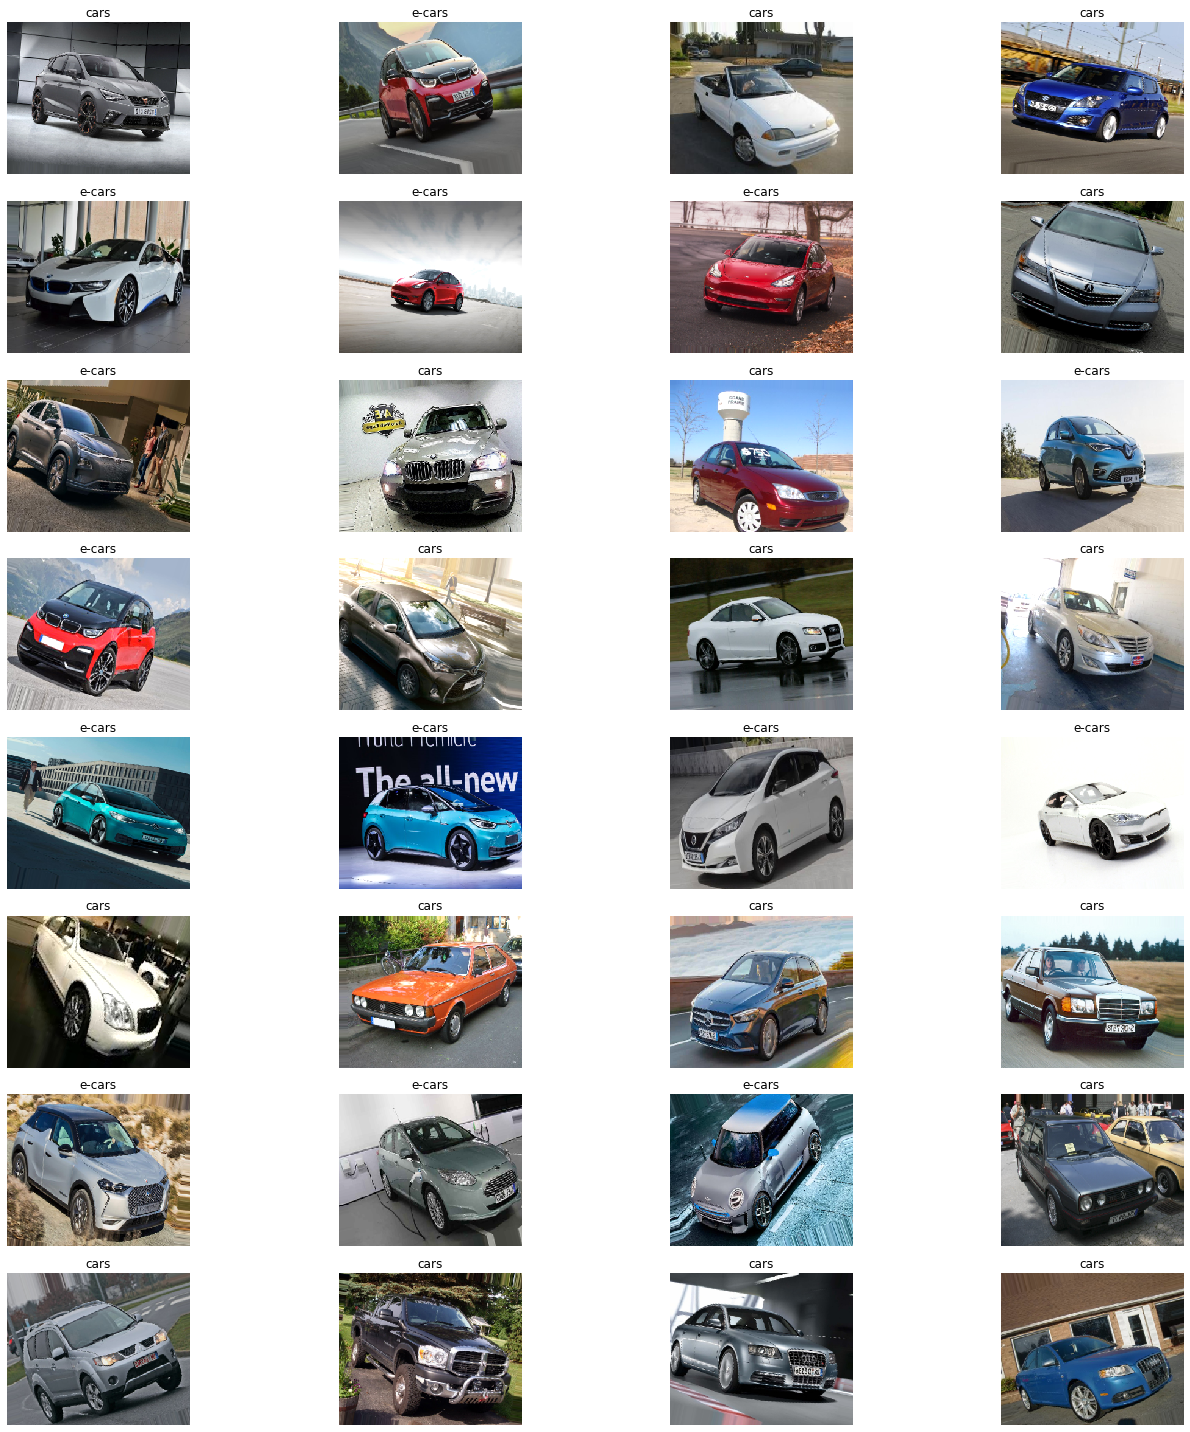

In [4]:
sample_training_images, labels = next(train_data_gen)
class_label = {v:k for k,v in train_data_gen.class_indices.items()}
fig, axes = plt.subplots(8, 4, figsize=(20,20))
axes = axes.flatten()
for img, label, ax in zip(sample_training_images, labels, axes):
    ax.set_title(class_label[np.argmax(label)])
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()

## Building the model

* First layer (Flatten) transforms the 2D-array (IMG_WIDTH x IMG_HEIGHT) to a 1-D array
* Last layer uses as activation "softmax" with number of classes (2) as argument for one-hot encoding

* All layers are fully-connected

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (7, 7), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  
    tf.keras.layers.Conv2D(32, (5, 5)),
    tf.keras.layers.Conv2D(32, (2, 2)),
    tf.keras.layers.MaxPooling2D(2, 6),
    tf.keras.layers.Conv2D(32, (2, 2)),
    tf.keras.layers.Conv2D(32, (2, 2)),    
    tf.keras.layers.MaxPooling2D(2, 4),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, 'relu'),
    tf.keras.layers.Dense(train_data_gen.num_classes, 'softmax')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 244, 294, 32)      4736      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 290, 32)      25632     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 239, 289, 32)      4128      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 72, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 71, 32)        4128      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 58, 70, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 18, 32)        0

## Train the model

In [6]:
snapshot_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="./snapshots",
    verbose=1)

def skip_broken_images(gen):
    while True:
        try:
            data, labels = next(gen)
            yield data, labels
        except GeneratorExit:
            break
        except:
            pass

In [ ]:
history = model.fit_generator(
    skip_broken_images(train_data_gen),
    steps_per_epoch= int(round(train_data_gen.samples / batch_size)),
    epochs=50,
    callbacks=[snapshot_callback]
)

Epoch 1/50


C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 1/59 [..............................] - ETA: 9:06 - loss: 0.7265 - accuracy: 0.3750

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 3/59 [>.............................] - ETA: 8:01 - loss: 2.3888 - accuracy: 0.4167

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 4/59 [=>............................] - ETA: 7:57 - loss: 1.9553 - accuracy: 0.4766

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 5/59 [=>............................] - ETA: 7:49 - loss: 1.6991 - accuracy: 0.4938

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 6/59 [==>...........................] - ETA: 7:43 - loss: 2.0144 - accuracy: 0.4844

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 7/59 [==>...........................] - ETA: 7:36 - loss: 1.8286 - accuracy: 0.4911

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


11/59 [====>.........................] - ETA: 6:51 - loss: 1.7474 - accuracy: 0.4801

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


12/59 [=====>........................] - ETA: 6:42 - loss: 1.7226 - accuracy: 0.4896

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/59 [=====>........................] - ETA: 6:31 - loss: 1.6537 - accuracy: 0.4952

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


19/59 [========>.....................] - ETA: 5:36 - loss: 1.4999 - accuracy: 0.5115

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


21/59 [=========>....................] - ETA: 5:19 - loss: 1.4272 - accuracy: 0.5119

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


23/59 [==========>...................] - ETA: 5:01 - loss: 1.3638 - accuracy: 0.5149

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


24/59 [===========>..................] - ETA: 4:52 - loss: 1.3369 - accuracy: 0.5117

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


25/59 [===========>..................] - ETA: 4:43 - loss: 1.3122 - accuracy: 0.5050

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


30/59 [==============>...............] - ETA: 4:03 - loss: 1.2169 - accuracy: 0.5031

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


34/59 [================>.............] - ETA: 3:28 - loss: 1.1593 - accuracy: 0.4945

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


42/59 [====================>.........] - ETA: 2:20 - loss: 1.0985 - accuracy: 0.5007

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


45/59 [=====================>........] - ETA: 1:53 - loss: 1.0731 - accuracy: 0.5007

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


47/59 [======================>.......] - ETA: 1:37 - loss: 1.0635 - accuracy: 0.5007

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


52/59 [=========================>....] - ETA: 57s - loss: 1.0443 - accuracy: 0.5024 

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


53/59 [=========================>....] - ETA: 48s - loss: 1.0389 - accuracy: 0.5006

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


55/59 [==========================>...] - ETA: 32s - loss: 1.0288 - accuracy: 0.5017

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


58/59 [============================>.] - ETA: 8s - loss: 1.0130 - accuracy: 0.5033 
Epoch 00001: saving model to ./snapshots
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 481s 8s/step - loss: 1.0083 - accuracy: 0.4995
Epoch 2/50
 2/59 [>.............................] - ETA: 7:38 - loss: 0.6833 - accuracy: 0.5781

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


13/59 [=====>........................] - ETA: 6:11 - loss: 0.6901 - accuracy: 0.5625

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


14/59 [======>.......................] - ETA: 6:03 - loss: 0.6865 - accuracy: 0.5714

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


22/59 [==========>...................] - ETA: 4:58 - loss: 0.6969 - accuracy: 0.5412

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


28/59 [=============>................] - ETA: 4:09 - loss: 0.7011 - accuracy: 0.5301

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


35/59 [================>.............] - ETA: 3:09 - loss: 0.7010 - accuracy: 0.5339

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


43/59 [====================>.........] - ETA: 2:06 - loss: 0.6981 - accuracy: 0.5334

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


44/59 [=====================>........] - ETA: 1:59 - loss: 0.6977 - accuracy: 0.5326

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


45/59 [=====================>........] - ETA: 1:51 - loss: 0.6972 - accuracy: 0.5347

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


49/59 [=======================>......] - ETA: 1:19 - loss: 0.6964 - accuracy: 0.5364

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


51/59 [========================>.....] - ETA: 1:03 - loss: 0.6961 - accuracy: 0.5349

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


53/59 [=========================>....] - ETA: 48s - loss: 0.6955 - accuracy: 0.5372

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


55/59 [==========================>...] - ETA: 32s - loss: 0.6948 - accuracy: 0.5370

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


56/59 [===========================>..] - ETA: 24s - loss: 0.6942 - accuracy: 0.5391

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/59 [============================>.] - ETA: 8s - loss: 0.6938 - accuracy: 0.5394 
Epoch 00002: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 474s 8s/step - loss: 0.6939 - accuracy: 0.5376
Epoch 3/50


C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 3/59 [>.............................] - ETA: 7:32 - loss: 0.6873 - accuracy: 0.5625

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 4/59 [=>............................] - ETA: 7:22 - loss: 0.6868 - accuracy: 0.5469

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


10/59 [====>.........................] - ETA: 6:35 - loss: 0.6812 - accuracy: 0.5656

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


17/59 [=======>......................] - ETA: 5:39 - loss: 0.6891 - accuracy: 0.5312

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


21/59 [=========>....................] - ETA: 5:07 - loss: 0.6914 - accuracy: 0.5119

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


24/59 [===========>..................] - ETA: 4:33 - loss: 0.6905 - accuracy: 0.5257

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


25/59 [===========>..................] - ETA: 4:26 - loss: 0.6899 - accuracy: 0.5311

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


26/59 [============>.................] - ETA: 4:19 - loss: 0.6903 - accuracy: 0.5274

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


30/59 [==============>...............] - ETA: 3:49 - loss: 0.6898 - accuracy: 0.5290

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


36/59 [=================>............] - ETA: 3:02 - loss: 0.6876 - accuracy: 0.5418

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


39/59 [==================>...........] - ETA: 2:39 - loss: 0.6870 - accuracy: 0.5434

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


43/59 [====================>.........] - ETA: 2:07 - loss: 0.6870 - accuracy: 0.5460

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


45/59 [=====================>........] - ETA: 1:51 - loss: 0.6862 - accuracy: 0.5460

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


50/59 [========================>.....] - ETA: 1:11 - loss: 0.6860 - accuracy: 0.5464

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


58/59 [============================>.] - ETA: 8s - loss: 0.6849 - accuracy: 0.5492 
Epoch 00003: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 473s 8s/step - loss: 0.6847 - accuracy: 0.5484
Epoch 4/50
 3/59 [>.............................] - ETA: 7:23 - loss: 0.6816 - accuracy: 0.5833

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 6/59 [==>...........................] - ETA: 7:15 - loss: 0.6711 - accuracy: 0.6250

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 8/59 [===>..........................] - ETA: 6:55 - loss: 0.6719 - accuracy: 0.6133

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


11/59 [====>.........................] - ETA: 6:03 - loss: 0.6761 - accuracy: 0.6173

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


14/59 [======>.......................] - ETA: 5:48 - loss: 0.6731 - accuracy: 0.6095

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


17/59 [=======>......................] - ETA: 5:30 - loss: 0.6696 - accuracy: 0.6221

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


18/59 [========>.....................] - ETA: 5:22 - loss: 0.6698 - accuracy: 0.6241

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


31/59 [==============>...............] - ETA: 3:43 - loss: 0.6644 - accuracy: 0.6338

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


32/59 [===============>..............] - ETA: 3:35 - loss: 0.6636 - accuracy: 0.6345

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


39/59 [==================>...........] - ETA: 2:40 - loss: 0.6609 - accuracy: 0.6262

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


41/59 [===================>..........] - ETA: 2:24 - loss: 0.6614 - accuracy: 0.6231

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


47/59 [======================>.......] - ETA: 1:36 - loss: 0.6660 - accuracy: 0.6118

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


50/59 [========================>.....] - ETA: 1:12 - loss: 0.6653 - accuracy: 0.6107

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


52/59 [=========================>....] - ETA: 56s - loss: 0.6635 - accuracy: 0.6131 

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


58/59 [============================>.] - ETA: 7s - loss: 0.6662 - accuracy: 0.6089 

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)



Epoch 00004: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 470s 8s/step - loss: 0.6667 - accuracy: 0.6075
Epoch 5/50
 2/59 [>.............................] - ETA: 7:43 - loss: 0.6515 - accuracy: 0.6406

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 4/59 [=>............................] - ETA: 7:25 - loss: 0.6876 - accuracy: 0.5469

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 8/59 [===>..........................] - ETA: 6:56 - loss: 0.6775 - accuracy: 0.5469

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/59 [======>.......................] - ETA: 6:05 - loss: 0.6639 - accuracy: 0.5893

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/59 [=============>................] - ETA: 4:11 - loss: 0.6563 - accuracy: 0.6083

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


29/59 [=============>................] - ETA: 4:04 - loss: 0.6561 - accuracy: 0.6088

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


33/59 [===============>..............] - ETA: 3:31 - loss: 0.6599 - accuracy: 0.6042

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


35/59 [================>.............] - ETA: 3:14 - loss: 0.6603 - accuracy: 0.6000

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


39/59 [==================>...........] - ETA: 2:42 - loss: 0.6590 - accuracy: 0.6018

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


44/59 [=====================>........] - ETA: 1:59 - loss: 0.6589 - accuracy: 0.5993

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


47/59 [======================>.......] - ETA: 1:35 - loss: 0.6593 - accuracy: 0.5969

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


52/59 [=========================>....] - ETA: 56s - loss: 0.6587 - accuracy: 0.5966 

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


53/59 [=========================>....] - ETA: 48s - loss: 0.6581 - accuracy: 0.5995

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


54/59 [==========================>...] - ETA: 40s - loss: 0.6588 - accuracy: 0.5976

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


55/59 [==========================>...] - ETA: 32s - loss: 0.6582 - accuracy: 0.5987

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


58/59 [============================>.] - ETA: 8s - loss: 0.6599 - accuracy: 0.5968 
Epoch 00005: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 475s 8s/step - loss: 0.6589 - accuracy: 0.5957
Epoch 6/50


C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/59 [=====>........................] - ETA: 6:11 - loss: 0.6388 - accuracy: 0.6250

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


19/59 [========>.....................] - ETA: 5:24 - loss: 0.6454 - accuracy: 0.6118

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


24/59 [===========>..................] - ETA: 4:44 - loss: 0.6466 - accuracy: 0.6146

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


26/59 [============>.................] - ETA: 4:28 - loss: 0.6472 - accuracy: 0.6130

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


36/59 [=================>............] - ETA: 3:02 - loss: 0.6490 - accuracy: 0.6103

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


38/59 [==================>...........] - ETA: 2:46 - loss: 0.6483 - accuracy: 0.6094

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


41/59 [===================>..........] - ETA: 2:23 - loss: 0.6473 - accuracy: 0.6114

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


42/59 [====================>.........] - ETA: 2:15 - loss: 0.6476 - accuracy: 0.6102

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


44/59 [=====================>........] - ETA: 1:59 - loss: 0.6472 - accuracy: 0.6101

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


49/59 [=======================>......] - ETA: 1:19 - loss: 0.6493 - accuracy: 0.6084

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


50/59 [========================>.....] - ETA: 1:12 - loss: 0.6489 - accuracy: 0.6094

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


58/59 [============================>.] - ETA: 8s - loss: 0.6484 - accuracy: 0.6121 

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "



Epoch 00006: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 474s 8s/step - loss: 0.6493 - accuracy: 0.6102
Epoch 7/50


C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


13/59 [=====>........................] - ETA: 6:14 - loss: 0.6362 - accuracy: 0.6346

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


15/59 [======>.......................] - ETA: 5:58 - loss: 0.6390 - accuracy: 0.6271

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


27/59 [============>.................] - ETA: 35:22 - loss: 0.6343 - accuracy: 0.6435

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


31/59 [==============>...............] - ETA: 27:28 - loss: 0.6330 - accuracy: 0.6411

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


34/59 [================>.............] - ETA: 22:43 - loss: 0.6353 - accuracy: 0.6406

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


35/59 [================>.............] - ETA: 21:20 - loss: 0.6370 - accuracy: 0.6374

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


41/59 [===================>..........] - ETA: 14:16 - loss: 0.6370 - accuracy: 0.6316

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


44/59 [=====================>........] - ETA: 11:19 - loss: 0.6347 - accuracy: 0.6341

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


45/59 [=====================>........] - ETA: 10:23 - loss: 0.6360 - accuracy: 0.6339

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


51/59 [========================>.....] - ETA: 5:27 - loss: 0.6385 - accuracy: 0.6322

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


58/59 [============================>.] - ETA: 37s - loss: 0.6379 - accuracy: 0.6346 
Epoch 00007: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 2195s 37s/step - loss: 0.6378 - accuracy: 0.6328
Epoch 8/50


C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 2/59 [>.............................] - ETA: 13:09 - loss: 0.5476 - accuracy: 0.7812

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 5/59 [=>............................] - ETA: 12:16 - loss: 0.5702 - accuracy: 0.7563

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


11/59 [====>.........................] - ETA: 10:09 - loss: 0.6195 - accuracy: 0.6852

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/59 [======>.......................] - ETA: 9:32 - loss: 0.6289 - accuracy: 0.6548

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


17/59 [=======>......................] - ETA: 9:03 - loss: 0.6257 - accuracy: 0.6550

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


18/59 [========>.....................] - ETA: 8:53 - loss: 0.6216 - accuracy: 0.6569

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


19/59 [========>.....................] - ETA: 8:42 - loss: 0.6302 - accuracy: 0.6483

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


22/59 [==========>...................] - ETA: 8:06 - loss: 0.6330 - accuracy: 0.6346

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


24/59 [===========>..................] - ETA: 7:40 - loss: 0.6309 - accuracy: 0.6378

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


29/59 [=============>................] - ETA: 6:41 - loss: 0.6300 - accuracy: 0.6433

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


35/59 [================>.............] - ETA: 5:26 - loss: 0.6328 - accuracy: 0.6429

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


46/59 [======================>.......] - ETA: 2:57 - loss: 0.6327 - accuracy: 0.6454

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


50/59 [========================>.....] - ETA: 2:03 - loss: 0.6314 - accuracy: 0.6450

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


55/59 [==========================>...] - ETA: 54s - loss: 0.6296 - accuracy: 0.6455 

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


57/59 [===========================>..] - ETA: 27s - loss: 0.6296 - accuracy: 0.6465

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


58/59 [============================>.] - ETA: 13s - loss: 0.6311 - accuracy: 0.6439
Epoch 00008: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 802s 14s/step - loss: 0.6323 - accuracy: 0.6414
Epoch 9/50
 2/59 [>.............................] - ETA: 13:15 - loss: 0.6428 - accuracy: 0.6406

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 9/59 [===>..........................] - ETA: 11:37 - loss: 0.6203 - accuracy: 0.6597

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


10/59 [====>.........................] - ETA: 11:26 - loss: 0.6192 - accuracy: 0.6625

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


11/59 [====>.........................] - ETA: 11:16 - loss: 0.6247 - accuracy: 0.6534

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


13/59 [=====>........................] - ETA: 10:50 - loss: 0.6321 - accuracy: 0.6394

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


18/59 [========>.....................] - ETA: 9:36 - loss: 0.6383 - accuracy: 0.6233

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


20/59 [=========>....................] - ETA: 9:08 - loss: 0.6407 - accuracy: 0.6141

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


23/59 [==========>...................] - ETA: 8:29 - loss: 0.6383 - accuracy: 0.6209

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


24/59 [===========>..................] - ETA: 8:17 - loss: 0.6358 - accuracy: 0.6250

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


26/59 [============>.................] - ETA: 7:51 - loss: 0.6364 - accuracy: 0.6274

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


31/59 [==============>...............] - ETA: 6:44 - loss: 0.6356 - accuracy: 0.6300

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


33/59 [===============>..............] - ETA: 6:15 - loss: 0.6378 - accuracy: 0.6297

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


34/59 [================>.............] - ETA: 6:00 - loss: 0.6364 - accuracy: 0.6314

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


38/59 [==================>...........] - ETA: 5:01 - loss: 0.6379 - accuracy: 0.6324

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


42/59 [====================>.........] - ETA: 4:03 - loss: 0.6336 - accuracy: 0.6406

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


43/59 [====================>.........] - ETA: 3:49 - loss: 0.6335 - accuracy: 0.6395

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


46/59 [======================>.......] - ETA: 3:02 - loss: 0.6285 - accuracy: 0.6413

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


47/59 [======================>.......] - ETA: 2:48 - loss: 0.6283 - accuracy: 0.6423

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


49/59 [=======================>......] - ETA: 2:19 - loss: 0.6270 - accuracy: 0.6429

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


51/59 [========================>.....] - ETA: 1:51 - loss: 0.6275 - accuracy: 0.6440

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


57/59 [===========================>..] - ETA: 27s - loss: 0.6263 - accuracy: 0.6459

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


58/59 [============================>.] - ETA: 13s - loss: 0.6266 - accuracy: 0.6450
Epoch 00009: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 827s 14s/step - loss: 0.6266 - accuracy: 0.6446
Epoch 10/50
 6/59 [==>...........................] - ETA: 12:25 - loss: 0.5927 - accuracy: 0.6562

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


10/59 [====>.........................] - ETA: 11:31 - loss: 0.6102 - accuracy: 0.6219

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


12/59 [=====>........................] - ETA: 11:01 - loss: 0.6122 - accuracy: 0.6276

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/59 [======>.......................] - ETA: 10:30 - loss: 0.6137 - accuracy: 0.6295

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


17/59 [=======>......................] - ETA: 9:48 - loss: 0.6217 - accuracy: 0.6268 

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


18/59 [========>.....................] - ETA: 9:34 - loss: 0.6229 - accuracy: 0.6267

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


22/59 [==========>...................] - ETA: 26:42 - loss: 0.6319 - accuracy: 0.6293

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


24/59 [===========>..................] - ETA: 23:37 - loss: 0.6282 - accuracy: 0.6354

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


28/59 [=============>................] - ETA: 18:30 - loss: 0.6326 - accuracy: 0.6250

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


29/59 [=============>................] - ETA: 17:26 - loss: 0.6318 - accuracy: 0.6261

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


32/59 [===============>..............] - ETA: 14:46 - loss: 0.6346 - accuracy: 0.6250

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


37/59 [=================>............] - ETA: 10:59 - loss: 0.6375 - accuracy: 0.6228

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


39/59 [==================>...........] - ETA: 9:42 - loss: 0.6362 - accuracy: 0.6270 

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


43/59 [====================>.........] - ETA: 7:23 - loss: 0.6364 - accuracy: 0.6298

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


46/59 [======================>.......] - ETA: 5:48 - loss: 0.6371 - accuracy: 0.6323

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


48/59 [=======================>......] - ETA: 4:49 - loss: 0.6341 - accuracy: 0.6366

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


53/59 [=========================>....] - ETA: 2:31 - loss: 0.6350 - accuracy: 0.6349

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


55/59 [==========================>...] - ETA: 1:39 - loss: 0.6337 - accuracy: 0.6357

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


57/59 [===========================>..] - ETA: 48s - loss: 0.6346 - accuracy: 0.6353 

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


58/59 [============================>.] - ETA: 24s - loss: 0.6345 - accuracy: 0.6368

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)



Epoch 00010: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 1420s 24s/step - loss: 0.6336 - accuracy: 0.6371
Epoch 11/50
10/59 [====>.........................] - ETA: 11:32 - loss: 0.5892 - accuracy: 0.6906

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


14/59 [======>.......................] - ETA: 18:56:00 - loss: 0.6194 - accuracy: 0.6741

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


15/59 [======>.......................] - ETA: 17:17:08 - loss: 0.6220 - accuracy: 0.6708

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


18/59 [========>.....................] - ETA: 13:26:20 - loss: 0.6150 - accuracy: 0.6771

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


21/59 [=========>....................] - ETA: 10:41:06 - loss: 0.6149 - accuracy: 0.6677

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


26/59 [============>.................] - ETA: 7:30:34 - loss: 0.6139 - accuracy: 0.6704

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


32/59 [===============>..............] - ETA: 5:00:13 - loss: 0.6120 - accuracy: 0.6717

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


33/59 [===============>..............] - ETA: 4:40:27 - loss: 0.6063 - accuracy: 0.6770

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


44/59 [=====================>........] - ETA: 2:01:50 - loss: 0.6236 - accuracy: 0.6587

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


46/59 [======================>.......] - ETA: 1:41:05 - loss: 0.6241 - accuracy: 0.6586

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


51/59 [========================>.....] - ETA: 56:12 - loss: 0.6259 - accuracy: 0.6621  

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


53/59 [=========================>....] - ETA: 40:35 - loss: 0.6246 - accuracy: 0.6637

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


58/59 [============================>.] - ETA: 6:11 - loss: 0.6268 - accuracy: 0.6608 
Epoch 00011: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 21566s 366s/step - loss: 0.6267 - accuracy: 0.6624
Epoch 12/50


C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 2/59 [>.............................] - ETA: 7:50 - loss: 0.6859 - accuracy: 0.6875

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


10/59 [====>.........................] - ETA: 6:04 - loss: 0.6075 - accuracy: 0.6952

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


15/59 [======>.......................] - ETA: 5:35 - loss: 0.6465 - accuracy: 0.6350

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


16/59 [=======>......................] - ETA: 5:29 - loss: 0.6438 - accuracy: 0.6364

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


20/59 [=========>....................] - ETA: 5:01 - loss: 0.6392 - accuracy: 0.6389

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


21/59 [=========>....................] - ETA: 4:54 - loss: 0.6366 - accuracy: 0.6413

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


22/59 [==========>...................] - ETA: 4:47 - loss: 0.6313 - accuracy: 0.6464

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


24/59 [===========>..................] - ETA: 4:32 - loss: 0.6312 - accuracy: 0.6486

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


25/59 [===========>..................] - ETA: 4:25 - loss: 0.6321 - accuracy: 0.6490

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


27/59 [============>.................] - ETA: 4:10 - loss: 0.6365 - accuracy: 0.6471

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


35/59 [================>.............] - ETA: 3:09 - loss: 0.6323 - accuracy: 0.6410

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


40/59 [===================>..........] - ETA: 2:30 - loss: 0.6312 - accuracy: 0.6438

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


41/59 [===================>..........] - ETA: 2:22 - loss: 0.6344 - accuracy: 0.6402

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


48/59 [=======================>......] - ETA: 1:27 - loss: 0.6303 - accuracy: 0.6479

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


52/59 [=========================>....] - ETA: 55s - loss: 0.6267 - accuracy: 0.6522 

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


54/59 [==========================>...] - ETA: 39s - loss: 0.6269 - accuracy: 0.6541

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


55/59 [==========================>...] - ETA: 31s - loss: 0.6285 - accuracy: 0.6524

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


58/59 [============================>.] - ETA: 7s - loss: 0.6343 - accuracy: 0.6500 
Epoch 00012: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 464s 8s/step - loss: 0.6335 - accuracy: 0.6512
Epoch 13/50
 7/59 [==>...........................] - ETA: 6:53 - loss: 0.7014 - accuracy: 0.6116

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 8/59 [===>..........................] - ETA: 6:48 - loss: 0.6843 - accuracy: 0.6289

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 9/59 [===>..........................] - ETA: 6:42 - loss: 0.6870 - accuracy: 0.6215

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


13/59 [=====>........................] - ETA: 6:10 - loss: 0.6636 - accuracy: 0.6226

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


17/59 [=======>......................] - ETA: 5:39 - loss: 0.6483 - accuracy: 0.6305

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


18/59 [========>.....................] - ETA: 5:31 - loss: 0.6501 - accuracy: 0.6267

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


20/59 [=========>....................] - ETA: 5:15 - loss: 0.6439 - accuracy: 0.6313

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


21/59 [=========>....................] - ETA: 5:06 - loss: 0.6411 - accuracy: 0.6324

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


36/59 [=================>............] - ETA: 3:05 - loss: 0.6313 - accuracy: 0.6372

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


45/59 [=====================>........] - ETA: 1:50 - loss: 0.6382 - accuracy: 0.6303

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


46/59 [======================>.......] - ETA: 1:43 - loss: 0.6389 - accuracy: 0.6281

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


51/59 [========================>.....] - ETA: 1:04:03 - loss: 0.6377 - accuracy: 0.6309

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


55/59 [==========================>...] - ETA: 29:44 - loss: 0.6334 - accuracy: 0.6345

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


56/59 [===========================>..] - ETA: 21:55 - loss: 0.6329 - accuracy: 0.6332

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


58/59 [============================>.] - ETA: 7:03 - loss: 0.6321 - accuracy: 0.6357 

C:\Users\Verena Teufl\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "



Epoch 00013: saving model to ./snapshots
INFO:tensorflow:Assets written to: ./snapshots\assets
59/59 [==============================] - 24589s 417s/step - loss: 0.6343 - accuracy: 0.6344
Epoch 14/50


In [ ]:
model.save()